## Importação dos dados

In [2]:
# Colab
from google.colab import drive
drive.mount('/content/drive')

url = '/content/drive/MyDrive/Pós'

Mounted at /content/drive


In [28]:
# Local
! ./secondary_download.sh
url = './data'

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  462k    0  462k    0     0   191k      0 --:--:--  0:00:02 --:--:--  191k
Unzipping outer dataset...
Archive:  ./data/secondary_mushroom_dataset.zip
  inflating: ./data/MushroomDataset.zip  
Unzipping inner dataset...
Archive:  ./data/MushroomDataset.zip
   creating: ./data/MushroomDataset/
  inflating: ./data/MushroomDataset/primary_data.csv  
  inflating: ./data/MushroomDataset/primary_data_meta.txt  
  inflating: ./data/MushroomDataset/secondary_data.csv  
  inflating: ./data/MushroomDataset/secondary_data_meta.txt  
Removing unwanted files...
Process completed.


In [ ]:
# Local
import pandas as pd

dados = pd.read_csv(f'{url}/secondary_data.csv', sep=';')
#dados = pd.read_csv(f'data/secondary_data.csv', sep=';') # Executar no VSCode

dados.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,...,stem-root,stem-surface,stem-color,veil-type,veil-color,has-ring,ring-type,spore-print-color,habitat,season
0,p,15.26,x,g,o,f,e,NaN,w,16.95,...,s,y,w,u,w,t,g,NaN,d,w
1,p,16.60,x,g,o,f,e,NaN,w,17.99,...,s,y,w,u,w,t,g,NaN,d,u
2,p,14.07,x,g,o,f,e,NaN,w,17.80,...,s,y,w,u,w,t,g,NaN,d,w
3,p,14.17,f,h,e,f,e,NaN,w,15.77,...,s,y,w,u,w,t,p,NaN,d,w
4,p,14.64,x,h,o,f,e,NaN,w,16.53,...,s,y,w,u,w,t,p,NaN,d,w


In [64]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  object 
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  object 
 3   cap-surface           46949 non-null  object 
 4   cap-color             61069 non-null  object 
 5   does-bruise-or-bleed  61069 non-null  object 
 6   gill-attachment       51185 non-null  object 
 7   gill-spacing          36006 non-null  object 
 8   gill-color            61069 non-null  object 
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-root             9531 non-null   object 
 12  stem-surface          22945 non-null  object 
 13  stem-color            61069 non-null  object 
 14  veil-type             3177 non-null   object 
 15  veil-color         

## Calculo de % de dados nulos

In [65]:
percentual_nulos = dados.isnull().sum() / len(dados) * 100
percentual_nulos

class                    0.000000
cap-diameter             0.000000
cap-shape                0.000000
cap-surface             23.121387
cap-color                0.000000
does-bruise-or-bleed     0.000000
gill-attachment         16.184971
gill-spacing            41.040462
gill-color               0.000000
stem-height              0.000000
stem-width               0.000000
stem-root               84.393064
stem-surface            62.427746
stem-color               0.000000
veil-type               94.797688
veil-color              87.861272
has-ring                 0.000000
ring-type                4.046243
spore-print-color       89.595376
habitat                  0.000000
season                   0.000000
dtype: float64

## Excluindo as colunas de alto %

In [66]:
cols_to_drop = ['stem-root', 'stem-surface', 'veil-type', 'veil-color', 'spore-print-color']
dados.drop(columns=cols_to_drop, inplace=True)

## Preencher as variaveis categoricas ausentes

In [67]:
cat_cols = dados.select_dtypes(include='object').columns
for col in cat_cols:
    dados[col].fillna('Desconhecido', inplace=True)

C:\Users\carlo\AppData\Local\Temp\ipykernel_4492\1915288256.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dados[col].fillna('Desconhecido', inplace=True)


## Preencher as variaveis numericas com a mediana

In [68]:
from sklearn.impute import SimpleImputer

# Preencher valores ausentes para variáveis numéricas com a mediana
num_cols = dados.select_dtypes(include='float64').columns
imputer = SimpleImputer(strategy='median')
dados[num_cols] = imputer.fit_transform(dados[num_cols])

In [69]:
dados.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,p,15.26,x,g,o,f,e,Desconhecido,w,16.95,17.09,w,t,g,d,w
1,p,16.60,x,g,o,f,e,Desconhecido,w,17.99,18.19,w,t,g,d,u
2,p,14.07,x,g,o,f,e,Desconhecido,w,17.80,17.74,w,t,g,d,w
3,p,14.17,f,h,e,f,e,Desconhecido,w,15.77,15.98,w,t,p,d,w
4,p,14.64,x,h,o,f,e,Desconhecido,w,16.53,17.20,w,t,p,d,w


## Normalizar as variaveis categoricas entre 1 e 0

In [70]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Codificar variáveis categóricas usando Label Encoding e normalizar para [0, 1]
label_encoder = LabelEncoder()
cat_scaler = MinMaxScaler()

for col in cat_cols:
    # Aplicar Label Encoding
    dados[col] = label_encoder.fit_transform(dados[col])

# Aplicando Min & Max scaler para variáveis categóricas
dados[cat_cols] = cat_scaler.fit_transform(dados[cat_cols])


In [71]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61069 entries, 0 to 61068
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   class                 61069 non-null  float64
 1   cap-diameter          61069 non-null  float64
 2   cap-shape             61069 non-null  float64
 3   cap-surface           61069 non-null  float64
 4   cap-color             61069 non-null  float64
 5   does-bruise-or-bleed  61069 non-null  float64
 6   gill-attachment       61069 non-null  float64
 7   gill-spacing          61069 non-null  float64
 8   gill-color            61069 non-null  float64
 9   stem-height           61069 non-null  float64
 10  stem-width            61069 non-null  float64
 11  stem-color            61069 non-null  float64
 12  has-ring              61069 non-null  float64
 13  ring-type             61069 non-null  float64
 14  habitat               61069 non-null  float64
 15  season             

In [72]:
dados.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1.0,15.26,1.000000,0.272727,0.545455,0.0,0.428571,0.0,0.909091,16.95,17.09,0.916667,1.0,0.375,0.0,1.000000
1,1.0,16.60,1.000000,0.272727,0.545455,0.0,0.428571,0.0,0.909091,17.99,18.19,0.916667,1.0,0.375,0.0,0.666667
2,1.0,14.07,1.000000,0.272727,0.545455,0.0,0.428571,0.0,0.909091,17.80,17.74,0.916667,1.0,0.375,0.0,1.000000
3,1.0,14.17,0.333333,0.363636,0.090909,0.0,0.428571,0.0,0.909091,15.77,15.98,0.916667,1.0,0.750,0.0,1.000000
4,1.0,14.64,1.000000,0.363636,0.545455,0.0,0.428571,0.0,0.909091,16.53,17.20,0.916667,1.0,0.750,0.0,1.000000


# Normalizar colunas númericas entre 0 e 1

In [73]:
dados[['cap-diameter','stem-height', 'stem-width']].describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,6.733854,6.581538,12.149410
std,5.264845,3.370017,10.035955
min,0.380000,0.000000,0.000000
25%,3.480000,4.640000,5.210000
50%,5.860000,5.950000,10.190000
75%,8.540000,7.740000,16.570000
max,62.340000,33.920000,103.910000


In [74]:
# Selecionar colunas numéricas para normalização
nor_cols = ['cap-diameter', 'stem-height', 'stem-width']

num_scaler = MinMaxScaler()

# Aplicando Min & Max scaler para variáveis categóricas
dados[nor_cols] = cat_scaler.fit_transform(dados[nor_cols])


In [75]:
dados[['cap-diameter','stem-height', 'stem-width']].describe()

,cap-diameter,stem-height,stem-width
count,61069.000000,61069.000000,61069.000000
mean,0.102548,0.194031,0.116922
std,0.084972,0.099352,0.096583
min,0.000000,0.000000,0.000000
25%,0.050032,0.136792,0.050140
50%,0.088444,0.175413,0.098066
75%,0.131698,0.228184,0.159465
max,1.000000,1.000000,1.000000


In [76]:
dados.head()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
0,1.0,0.240155,1.000000,0.272727,0.545455,0.0,0.428571,0.0,0.909091,0.499705,0.164469,0.916667,1.0,0.375,0.0,1.000000
1,1.0,0.261782,1.000000,0.272727,0.545455,0.0,0.428571,0.0,0.909091,0.530366,0.175055,0.916667,1.0,0.375,0.0,0.666667
2,1.0,0.220949,1.000000,0.272727,0.545455,0.0,0.428571,0.0,0.909091,0.524764,0.170725,0.916667,1.0,0.375,0.0,1.000000
3,1.0,0.222563,0.333333,0.363636,0.090909,0.0,0.428571,0.0,0.909091,0.464917,0.153787,0.916667,1.0,0.750,0.0,1.000000
4,1.0,0.230148,1.000000,0.363636,0.545455,0.0,0.428571,0.0,0.909091,0.487323,0.165528,0.916667,1.0,0.750,0.0,1.000000


## Calcular correlação entre os dados

In [77]:
dados.corr()

,class,cap-diameter,cap-shape,cap-surface,cap-color,does-bruise-or-bleed,gill-attachment,gill-spacing,gill-color,stem-height,stem-width,stem-color,has-ring,ring-type,habitat,season
class,1.000000,-0.181139,-0.106309,0.011372,0.026411,-0.019889,-0.100306,-0.039294,-0.060701,-0.121593,-0.197368,-0.094772,0.057559,0.101125,-0.041923,-0.054046
cap-diameter,-0.181139,1.000000,0.103923,0.108521,0.042108,0.179440,0.179878,-0.150620,0.221675,0.422560,0.695330,0.008670,0.077024,0.022142,-0.125820,0.037305
cap-shape,-0.106309,0.103923,1.000000,-0.080863,0.016312,0.191804,0.073131,-0.099454,0.115703,0.034473,0.157440,0.009061,0.036017,0.130508,-0.124754,-0.027178
cap-surface,0.011372,0.108521,-0.080863,1.000000,0.082074,-0.041010,-0.067048,0.016067,-0.002811,0.097202,0.010484,0.020476,0.195341,0.084449,0.105162,0.039367
cap-color,0.026411,0.042108,0.016312,0.082074,1.000000,0.010657,0.006760,0.051161,0.136560,-0.010732,0.000573,0.265525,0.070843,-0.020698,0.031706,0.008443
does-bruise-or-bleed,-0.019889,0.179440,0.191804,-0.041010,0.010657,1.000000,0.061222,-0.159147,0.018613,0.076596,0.183514,-0.024913,0.019195,0.004888,-0.102747,-0.051146
gill-attachment,-0.100306,0.179878,0.073131,-0.067048,0.006760,0.061222,1.000000,0.094518,0.108437,0.060388,0.233467,-0.012144,-0.150122,-0.104513,-0.043158,-0.031369
gill-spacing,-0.039294,-0.150620,-0.099454,0.016067,0.051161,-0.159147,0.094518,1.000000,-0.234506,-0.292221,-0.022442,-0.028102,-0.105553,-0.123743,0.059491,0.058220
gill-color,-0.060701,0.221675,0.115703,-0.002811,0.136560,0.018613,0.108437,-0.234506,1.000000,0.157327,0.113915,0.149863,-0.055640,-0.026665,-0.075768,-0.011360
stem-height,-0.121593,0.422560,0.034473,0.097202,-0.010732,0.076596,0.060388,-0.292221,0.157327,1.000000,0.436117,0.138458,0.281049,0.150040,-0.020664,-0.020630


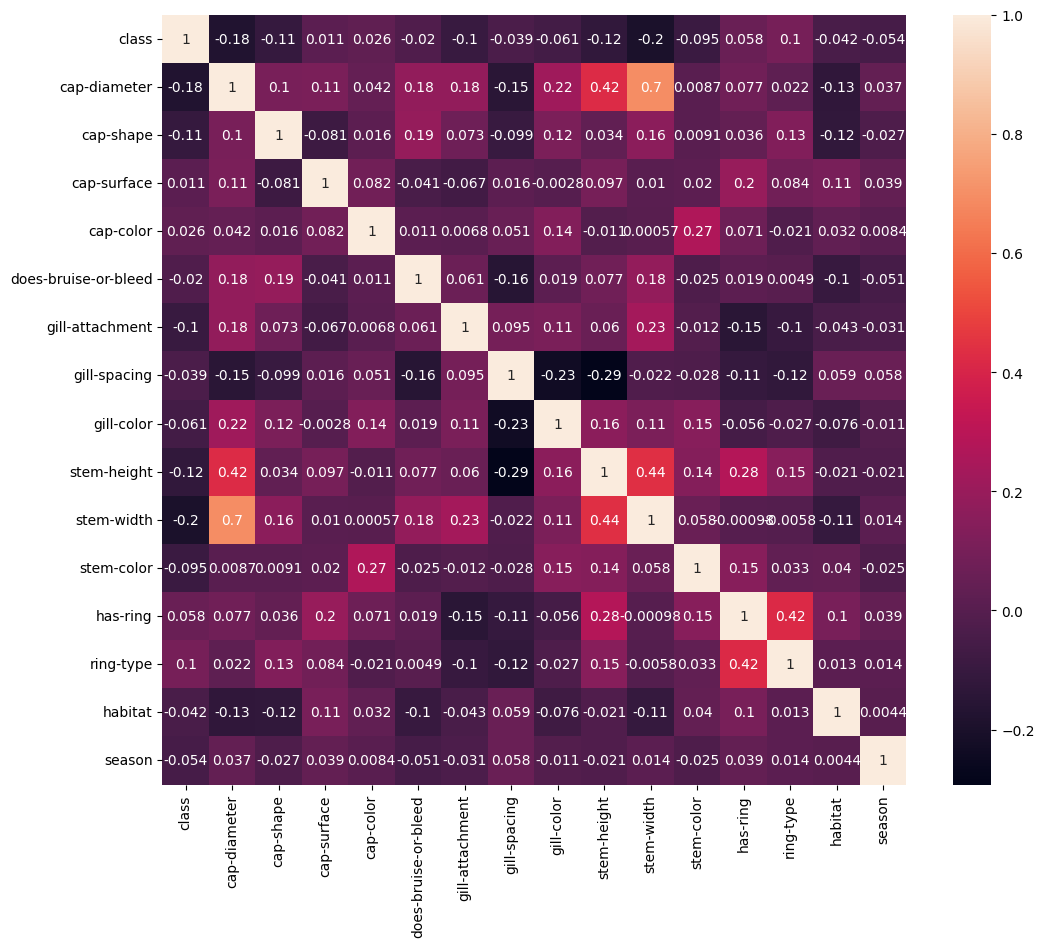

In [78]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
heat = sns.heatmap(dados.corr(), annot=True)
plt.show()

## Treinando o modelo

In [79]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


x = dados.drop(columns=['class'])
y = dados['class']


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


model = RandomForestClassifier(random_state=42,  max_depth=7, n_estimators=42)
model.fit(x_train, y_train)


y_pred = model.predict(x_test)


print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))


Acurácia: 0.934010152284264

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.91      0.94      0.93      5374
         1.0       0.95      0.93      0.94      6840

    accuracy                           0.93     12214
   macro avg       0.93      0.93      0.93     12214
weighted avg       0.93      0.93      0.93     12214


Matriz de Confusão:
[[5046  328]
 [ 478 6362]]


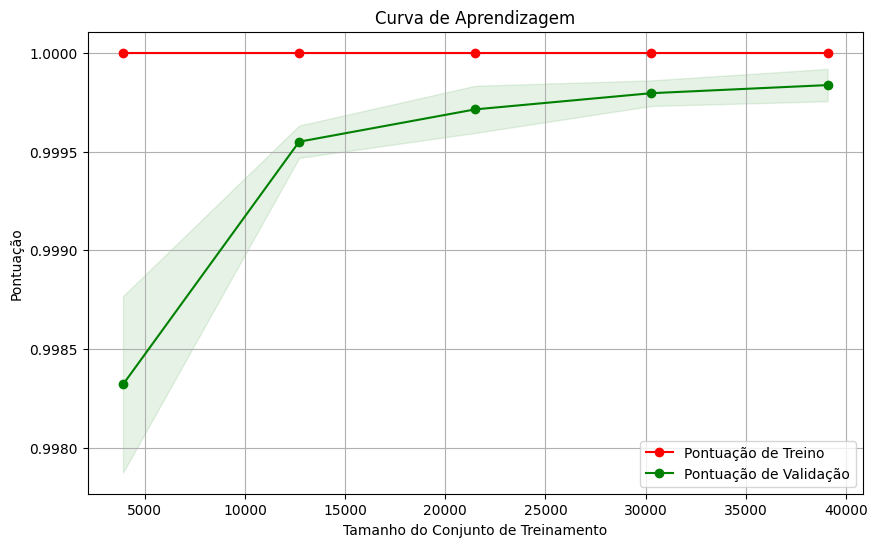

In [87]:
from utils import plot_learning_curve

plot_learning_curve(model, x_train, y_train, cv=5, n_jobs=-1)
plt.show()

In [89]:
import numpy as np
from sklearn.model_selection import GridSearchCV

model = RandomForestClassifier(random_state=42)

param_grid = {
    'n_estimators': [35, 40, 42, 45],
    'max_depth': [5, 6, 7, 8]
}

grid_search = GridSearchCV(model, param_grid, cv=5, n_jobs=-1, verbose=2, error_score=np.nan, scoring='accuracy')
grid_search.fit(x_train, y_train)

best_rf_classifier = grid_search.best_estimator_

print(f"Melhores hiperparâmetros: {best_rf_classifier}")

Fitting 5 folds for each of 16 candidates, totalling 80 fits
Melhores hiperparâmetros: RandomForestClassifier(max_depth=8, n_estimators=40, random_state=42)


Acurácia: 0.9578352710004913

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.94      0.96      0.95      5374
         1.0       0.97      0.95      0.96      6840

    accuracy                           0.96     12214
   macro avg       0.96      0.96      0.96     12214
weighted avg       0.96      0.96      0.96     12214


Matriz de Confusão:
[[5175  199]
 [ 316 6524]]


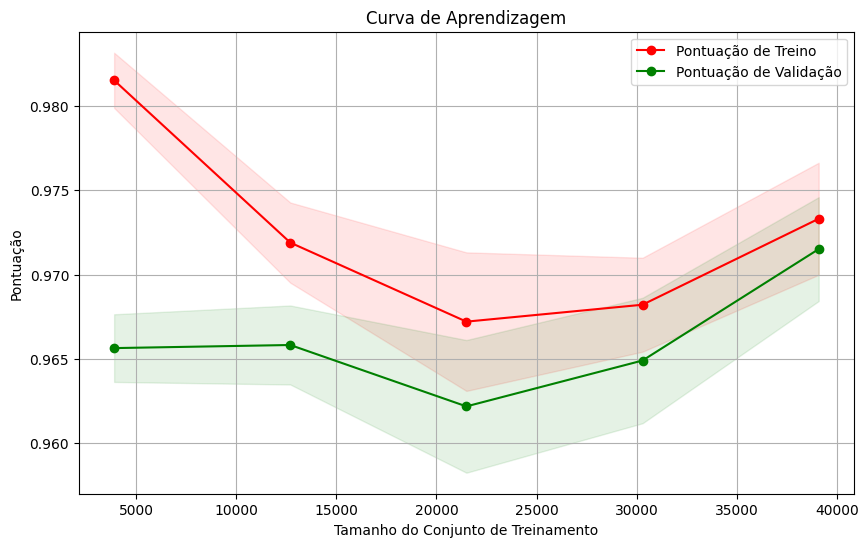

In [92]:
best_rf_classifier.fit(x_train, y_train)

y_pred = best_rf_classifier.predict(x_test)

# Avaliar o desempenho
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

plot_learning_curve(best_rf_classifier, x_train, y_train, cv=5, n_jobs=-1)
plt.show()

In [80]:
from sklearn.linear_model import LogisticRegression

# Substituir Random Forest pelo modelo Logistic Regression
model2 = LogisticRegression(random_state=42, max_iter=100)
model2.fit(x_train, y_train)

y_pred = model2.predict(x_test)

# Avaliar o desempenho
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))


Acurácia: 0.6278041591616178

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.60      0.47      0.53      5374
         1.0       0.64      0.75      0.69      6840

    accuracy                           0.63     12214
   macro avg       0.62      0.61      0.61     12214
weighted avg       0.62      0.63      0.62     12214


Matriz de Confusão:
[[2538 2836]
 [1710 5130]]


In [81]:
from sklearn.neighbors import KNeighborsClassifier

# Substituir Random Forest pelo modelo KNN
model3 = KNeighborsClassifier(n_neighbors=5)
model3.fit(x_train, y_train)

y_pred = model3.predict(x_test)

# Avaliar o desempenho
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))

Acurácia: 0.9991812673980678

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      5374
         1.0       1.00      1.00      1.00      6840

    accuracy                           1.00     12214
   macro avg       1.00      1.00      1.00     12214
weighted avg       1.00      1.00      1.00     12214


Matriz de Confusão:
[[5374    0]
 [  10 6830]]


In [82]:
from sklearn.svm import SVC

# Substituir Random Forest pelo modelo SVM
model4 = SVC(random_state=42)
model4.fit(x_train, y_train)

y_pred = model4.predict(x_test)

# Avaliar o desempenho
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred))
print("\nMatriz de Confusão:")
print(confusion_matrix(y_test, y_pred))


Acurácia: 0.9576715244801048

Relatório de Classificação:
              precision    recall  f1-score   support

         0.0       0.96      0.94      0.95      5374
         1.0       0.96      0.97      0.96      6840

    accuracy                           0.96     12214
   macro avg       0.96      0.96      0.96     12214
weighted avg       0.96      0.96      0.96     12214


Matriz de Confusão:
[[5075  299]
 [ 218 6622]]


### Visualizando o Treinamento dos Modelos com Samples de 1%, 10% e 100%

Classificadores escolhidos para refino: **SVC** e **RandomForestClassifier**

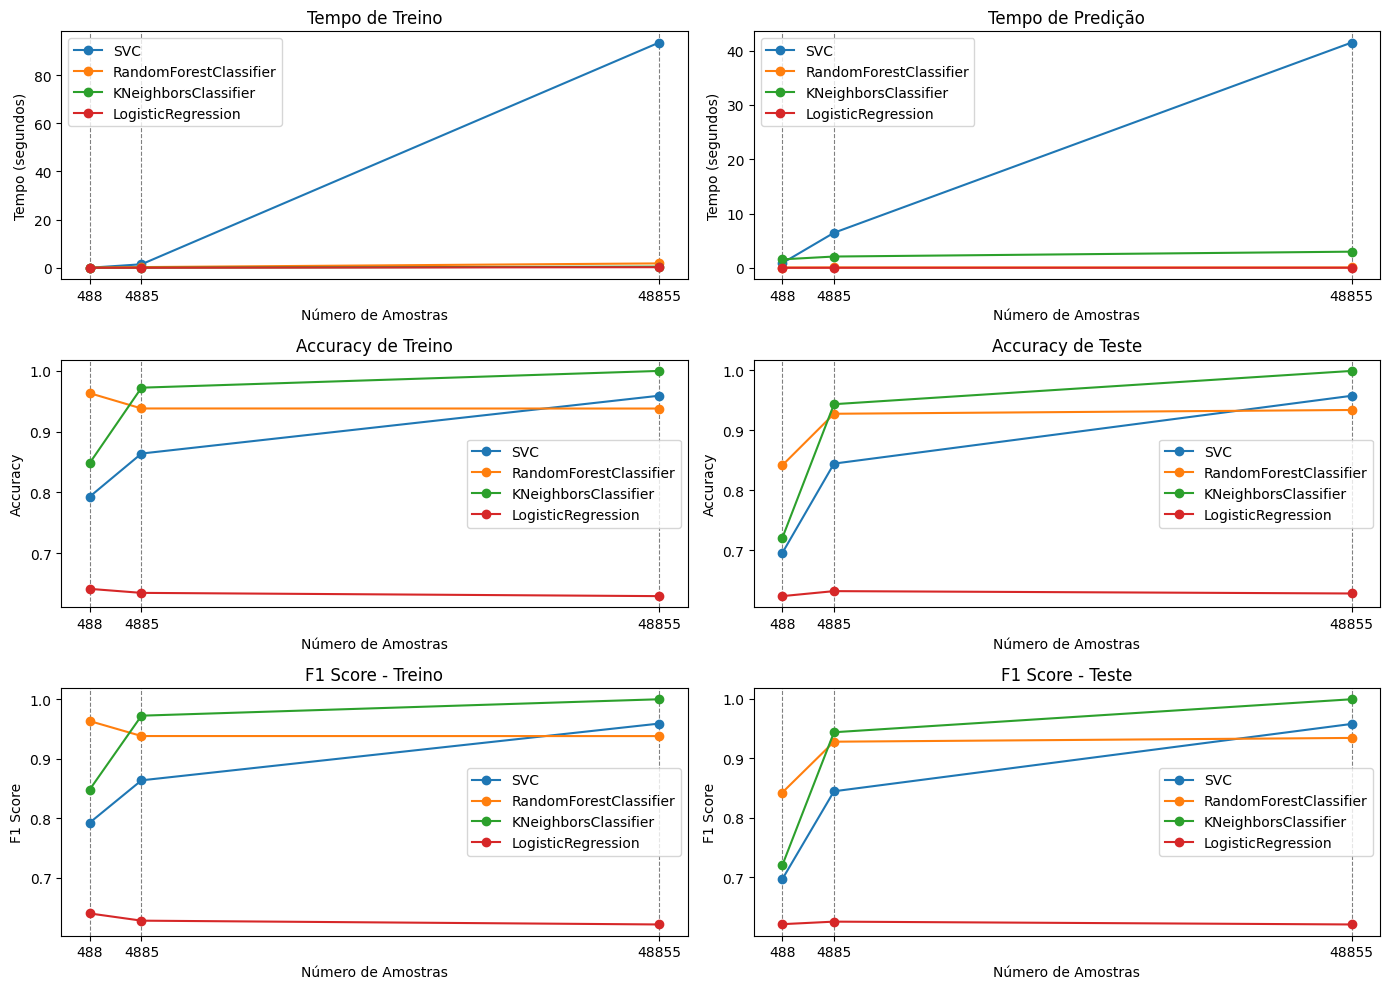

In [83]:
import time
from sklearn.metrics import f1_score

seed = 42
clf_svc = SVC(random_state=seed)
clf_rf = RandomForestClassifier(random_state=seed, max_depth=7, n_estimators=42)
clf_knn = KNeighborsClassifier(n_neighbors=5)
clf_lr = LogisticRegression(random_state=42, max_iter=100)

samples_100 = len(y_train)
samples_10 = samples_100 // 10
samples_1 = samples_100 // 100

results = {}
for clf in [clf_svc, clf_rf, clf_knn, clf_lr]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {
        "training_time": [],
        "prediction_time": [],
        "train_accuracy": [],
        "test_accuracy": [],
        "train_f1_score": [],
        "test_f1_score": [],
    }

    for samples in [samples_1, samples_10, samples_100]:
        # Tempo de treino
        start_time = time.time()
        clf.fit(x_train[:samples], y_train[:samples])
        training_time = time.time() - start_time

        # Tempo de predição
        start_time = time.time()
        y_pred = clf.predict(x_test)
        prediction_time = time.time() - start_time

        # Accuracy para Treino e Teste
        train_accuracy = accuracy_score(y_train[:samples], clf.predict(x_train[:samples]))
        test_accuracy = accuracy_score(y_test, y_pred)

        # F1 score para Treino e teste
        train_f1 = f1_score(y_train[:samples], clf.predict(x_train[:samples]), average='weighted')
        test_f1 = f1_score(y_test, y_pred, average='weighted')

        # Resultados para o Gráfico
        results[clf_name]["training_time"].append(training_time)
        results[clf_name]["prediction_time"].append(prediction_time)
        results[clf_name]["train_accuracy"].append(train_accuracy)
        results[clf_name]["test_accuracy"].append(test_accuracy)
        results[clf_name]["train_f1_score"].append(train_f1)
        results[clf_name]["test_f1_score"].append(test_f1)

fig, axes = plt.subplots(3, 2, figsize=(14, 10))

models = list(results.keys())

# Tempo de Treinamento
for model_name in models:
    axes[0, 0].plot([samples_1, samples_10, samples_100], results[model_name]['training_time'], label=model_name, marker='o')

axes[0, 0].set_title('Tempo de Treino')
axes[0, 0].set_xlabel('Número de Amostras')
axes[0, 0].set_ylabel('Tempo (segundos)')
axes[0, 0].legend()

# Tempo de Predição
for model_name in models:
    axes[0, 1].plot([samples_1, samples_10, samples_100], results[model_name]['prediction_time'], label=model_name, marker='o')
axes[0, 1].set_title('Tempo de Predição')
axes[0, 1].set_xlabel('Número de Amostras')
axes[0, 1].set_ylabel('Tempo (segundos)')
axes[0, 1].legend()

# Accuracy de Treino
for model_name in models:
    axes[1, 0].plot([samples_1, samples_10, samples_100], results[model_name]['train_accuracy'], label=model_name, marker='o')
axes[1, 0].set_title('Accuracy de Treino')
axes[1, 0].set_xlabel('Número de Amostras')
axes[1, 0].set_ylabel('Accuracy')
axes[1, 0].legend()

# Accuracy de Teste
for model_name in models:
    axes[1, 1].plot([samples_1, samples_10, samples_100], results[model_name]['test_accuracy'], label=model_name, marker='o')
axes[1, 1].set_title('Accuracy de Teste')
axes[1, 1].set_xlabel('Número de Amostras')
axes[1, 1].set_ylabel('Accuracy')
axes[1, 1].legend()

#Treino
for model_name in models:
    axes[2, 0].plot([samples_1, samples_10, samples_100], results[model_name]['train_f1_score'], label=model_name, marker='o')
axes[2, 0].set_title('F1 Score - Treino')
axes[2, 0].set_xlabel('Número de Amostras')
axes[2, 0].set_ylabel('F1 Score')
axes[2, 0].legend()

# Teste
for model_name in models:
    axes[2, 1].plot([samples_1, samples_10, samples_100], results[model_name]['test_f1_score'], label=model_name, marker='o')
axes[2, 1].set_title('F1 Score - Teste')
axes[2, 1].set_xlabel('Número de Amostras')
axes[2, 1].set_ylabel('F1 Score')
axes[2, 1].legend()

for ax in axes.flatten():
    ax.set_xticks([samples_1, samples_10, samples_100])
    ax.grid(True, which='both', axis='x', linestyle='--', color='gray')

plt.tight_layout()
plt.show()

### Salvar Modelos Treinados e Transformações

In [84]:
import joblib

# modelos
joblib.dump(model, "./model/Model_Random_Forest.sav")
joblib.dump(model2, "./model/Model_Logistic_Regression.sav")
joblib.dump(model3, "./model/Model_KNN.sav")
joblib.dump(model4, "./model/Model_SVC.sav")

# transformacoes
joblib.dump(imputer, "./transform/Imputer.sav")
joblib.dump(label_encoder, "./transform/LabelEncoder.sav")
joblib.dump(cat_scaler, "./transform/CatScaler.sav")
joblib.dump(num_scaler, "./transform/NumScaler.sav")


['./transform/NumScaler.sav']

### Carregar Modelos Treinados e Transformações

In [85]:
import joblib

# modelos
model_load = joblib.load("./model/Model_Random_Forest.sav")
model2_load = joblib.load("./model/Model_Logistic_Regression.sav")
model3_load = joblib.load("./model/Model_KNN.sav")
model4_load = joblib.load("./model/Model_SVC.sav")

imputer_load = joblib.load("./transform/Imputer.sav")
label_encoder_load = joblib.load("./transform/LabelEncoder.sav")
cat_scaler_load = joblib.load("./transform/CatScaler.sav")
num_scaler_load = joblib.load("./transform/NumScaler.sav")


### Realizando Inferência via Endpoint

#### Definir onde carregar os modelos/transformers

```python
model_load = joblib.load("./model/Model_Random_Forest.sav")
imputer_load = joblib.load("./transform/Imputer.sav")
label_encoder_load = joblib.load("./transform/LabelEncoder.sav")
cat_scaler_load = joblib.load("./transform/CatScaler.sav")
num_scaler_load = joblib.load("./transform/NumScaler.sav")

categorical_cols = []
numerical_cols = []
```


#### Endpoint
```python
@app.post("/mushrooms/predictions")
async def predict(dto: MushroomDTO) -> object:
    mush_for_prediction = remover_campos_invalidos() # retorna um Data frame

    preprocessor = ColumnTransformer(
        transformers=[
            ('cat', Pipeline([
                ('imputer', imputer_load), # 1
                ('label', label_encoder_load), # 2
                ('cat_scaler', cat_scaler_load)  # 3
            ]), categorical_cols),
            ('num', num_scaler_load, numerical_cols), # 4
        ])

    mushroom_pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', model_load)
        ])

    try:
        prediction = mushroom_pipeline.predict(mush_for_prediction)
    except Exception as e:
        raise HTTPException(status_code=500, detail=f"Prediction has failed: {str(e)}")

    return {"prediction": prediction.tolist()}
```